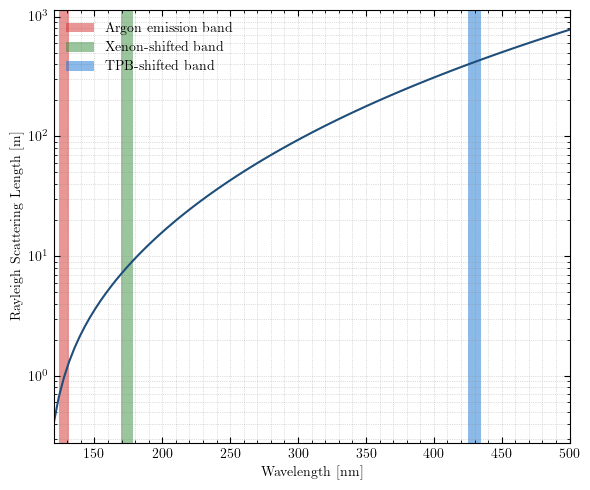

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

def get_refractive_index(wl):
    x = 0.334 + 0.1 * wl * wl / (wl * wl - 106.6 * 106.6) + 0.008 * wl * wl / (wl * wl - 908.3 * 908.3)
    return np.sqrt(1 + (3 * x / (3 - x)))

def rayleigh_scattering_length(wl):
    n = get_refractive_index(wl)
    wl *= 1e-9
    T = 90  # K
    iso_compress = 2.21e-4 * 0.00001  # m2 / kg
    boltz_k = 1.380649e-23  # m2 kg s-2 K-1
    inverse_rl = (16 * np.pi ** 3 / (6 * wl ** 4)) * (
                boltz_k * T * iso_compress * (((n ** 2 - 1) * (n ** 2 + 2)) / 3) ** 2)
    return 1.0 / inverse_rl

wavelengths = np.linspace(120, 500, 100)

scattering_lengths = [rayleigh_scattering_length(wl) for wl in wavelengths]

fig, ax = plt.subplots(figsize=(6, 5))

deep_blue = '#1E4E79'
ax.plot(wavelengths, scattering_lengths, color=deep_blue)

ax.set_xlabel(r'Wavelength [nm]')
ax.set_ylabel(r'Rayleigh Scattering Length [m]')

ax.set_yscale('log')
ax.set_xlim(120, 500)

ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

opacity = 0.5  # Adjusted opacity

# Retaining your improved color choices from previous suggestion
argon_color = '#D32F2F'   # A shade of red
xenon_color = '#388E3C'   # A shade of green
tpb_color = '#1976D2'     # A shade of blue

ax.axvspan(128 - 7.4/2, 128 + 7.4/2, facecolor=argon_color, alpha=opacity, label='Argon emission band')
ax.axvspan(174 - 8.9/2, 174 + 8.9/2, facecolor=xenon_color, alpha=opacity, label='Xenon-shifted band')
ax.axvspan(430 - 10/2, 430 + 10/2, facecolor=tpb_color, alpha=opacity, label='TPB-shifted band')

legend = ax.legend(loc='upper left', fontsize=10, frameon=False)

plt.tight_layout()
plt.show()

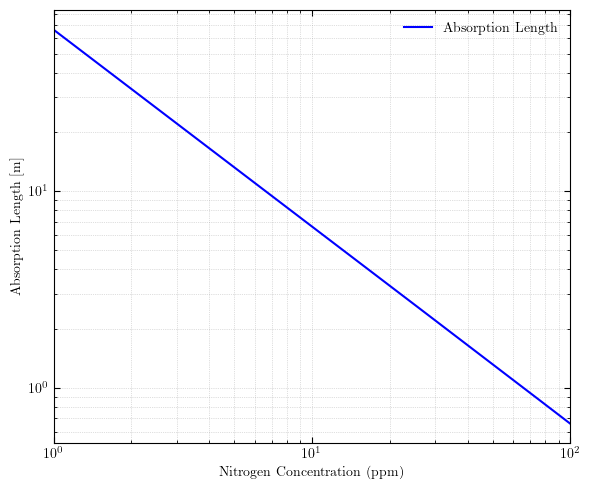

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

def GetAbsorptionLength(nitrogen_concentration):
    p = 1.51e-4  # cm-1 ppm-1
    abs_length = -1. / (100. * np.log(1 - p * nitrogen_concentration))
    return abs_length

nitrogen_concentrations = np.linspace(1, 100, 1000)

abs_lengths = [GetAbsorptionLength(n) for n in nitrogen_concentrations]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(nitrogen_concentrations, abs_lengths, color='blue', label=r'Absorption Length')

ax.set_xlabel(r'Nitrogen Concentration (ppm)')
ax.set_ylabel(r'Absorption Length [m]')

ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1, 100)

legend = ax.legend(loc='upper right', fontsize=10, frameon=False)

plt.tight_layout()
plt.show()


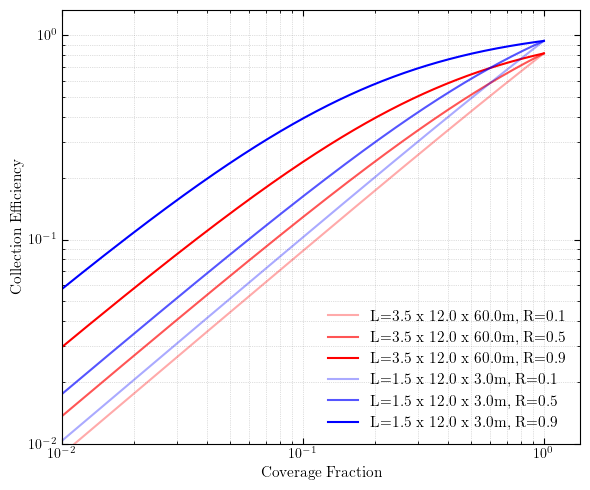

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import matplotlib as mpl

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

def return_rayleigh_length(rayleigh_scattering):
    return rayleigh_scattering

def return_effective_quenched_length(rayleigh_scattering, absorption_length):
    return 1 / (1 / rayleigh_scattering + 1 / absorption_length)

def return_effective_scale_length(width, height, depth):
    volume = height * width * depth
    surface_area = 2 * (height * width) + 2 * (height * depth) + 2 * (depth * width)
    return 6 * volume / surface_area

def return_survival_prob(effective_scale_length, effective_quenched_length):
    return (effective_quenched_length / effective_scale_length) * (1 - exp(-effective_scale_length / effective_quenched_length))

def return_collection_efficiency(f, width, height, depth, rayleigh_scattering, absorption_length, insensitive_surface_regen):
    effective_scale_length = return_effective_scale_length(width, height, depth)
    effective_quenched_length = return_effective_quenched_length(rayleigh_scattering, absorption_length)
    survival_prob = return_survival_prob(effective_scale_length, effective_quenched_length)
    return (survival_prob * f) / (1 - (survival_prob * insensitive_surface_regen * (1 - f)) - ((1 - survival_prob) * (effective_quenched_length / rayleigh_scattering)))

widths = [3.5, 1.5]
heights = [12.0, 12.0]
depths = [60.0, 3.0]
rayleigh_scattering = 1
absorption_length = 30
insensitive_surface_regen_values = [0.1, 0.5, 0.9]

fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the figure size

coverage = np.linspace(0, 1, num=1001)

# Define the list of colors
colors = ['red', 'blue', 'green']

vibrancy_factor = 1  # Adjust the vibrancy factor to control the starting color

for i, (width, height, depth) in enumerate(zip(widths, heights, depths)):
    color = colors[i % len(colors)]  # Select the color based on the scenario index

    for j, insensitive_surface_regen in enumerate(insensitive_surface_regen_values):
        collection_efficiency = [return_collection_efficiency(f, width, height, depth, rayleigh_scattering, absorption_length, insensitive_surface_regen) for f in coverage]

        norm_value = (j + 1) / len(insensitive_surface_regen_values) * vibrancy_factor  # Adjust the normalization range

        ax.plot(coverage, collection_efficiency, color=color, alpha=norm_value, label=f'L={width} x {height} x {depth}m, R={insensitive_surface_regen}')

# Set the x and y axis labels with LaTeX rendering
ax.set_xlabel(r'Coverage Fraction', fontsize=11)
ax.set_ylabel(r'Collection Efficiency', fontsize=11)

# Adjust grid, ticks, and other visual elements
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(bottom=0.01)  # Set the lower limit of the y-axis to 0.01
ax.set_xlim(left=0.01)

legend = ax.legend(loc='lower right', fontsize=11, frameon=False)

# Adjust layout and display
plt.tight_layout()
plt.show()
